# **Calories** **Burnt** **Prediction**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')


In [ ]:
calories_df=pd.read_csv('calories.csv')
exercise_df=pd.read_csv('exercise.csv')

In [ ]:
df = pd.read_csv('calories.csv')
df.head()


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise_df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [ ]:
calories_df

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


Merging both datasets

In [ ]:
import pandas as pd
df = pd.merge(exercise_df, calories_df, on="User_ID", how = 'inner')

In [ ]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [ ]:
df.shape


(15000, 9)

In [ ]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


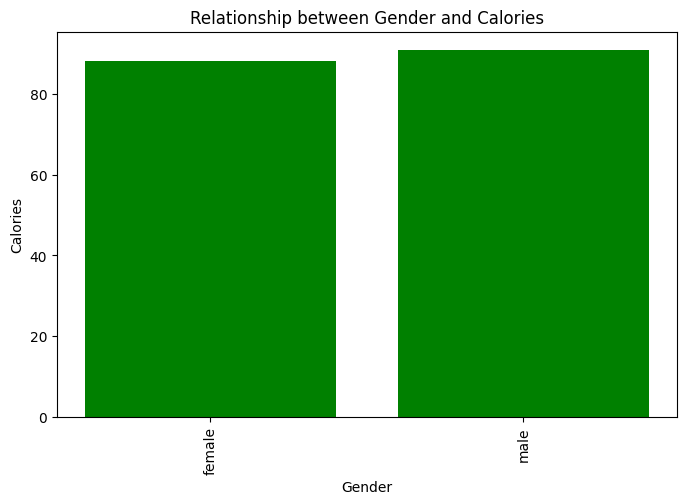

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the variables you want to compare
x_variable = "Gender"  # Change this to the variable of interest
y_variable = "Calories"          # Change this to the variable of interest

# Group the data by the x_variable and calculate the mean of the y_variable
grouped_data = df.groupby(x_variable)[y_variable].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(grouped_data[x_variable], grouped_data[y_variable], color='green')
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title(f"Relationship between {x_variable} and {y_variable}")
plt.xticks(rotation=90)
plt.show()

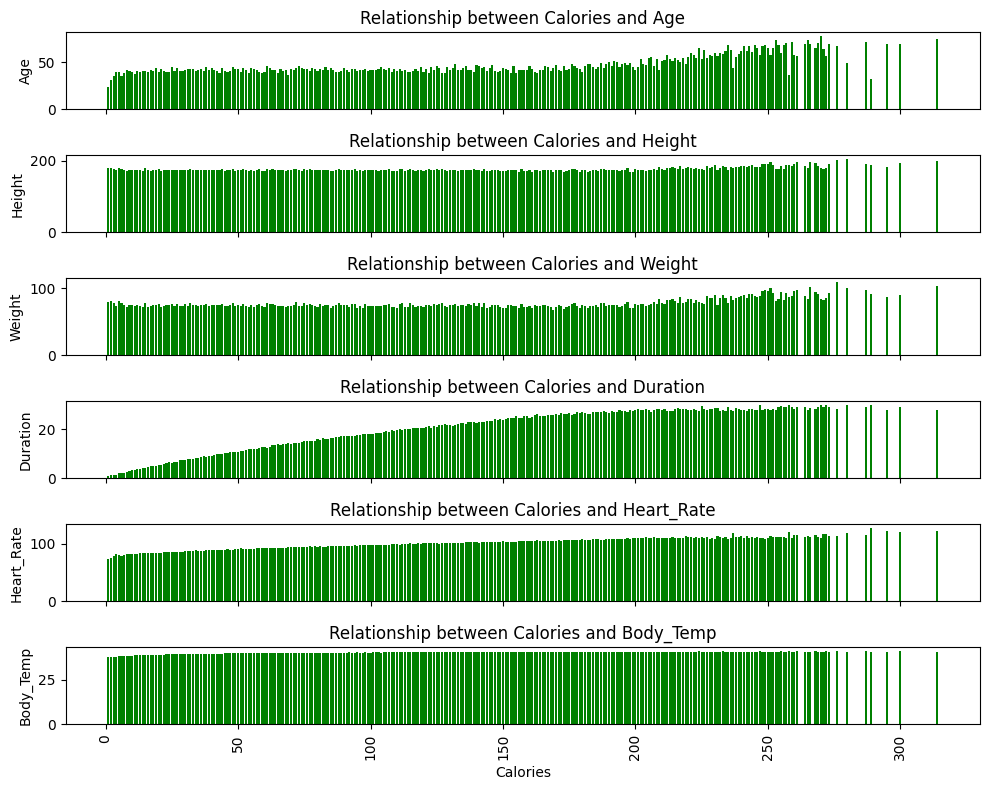

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the variables you want to compare
variables_of_interest = ["Age", "Height", "Weight", "Duration", "Heart_Rate", "Body_Temp"]
x_variable = "Calories"

# Create subplots
fig, axes = plt.subplots(nrows=len(variables_of_interest), ncols=1, figsize=(10, 8), sharex=True)

# Iterate over each variable of interest
for i, y_variable in enumerate(variables_of_interest):
    # Group the data by the x_variable and calculate the mean of the y_variable
    grouped_data = df.groupby(x_variable)[y_variable].mean().reset_index()

    # Create a bar plot for each variable
    axes[i].bar(grouped_data[x_variable], grouped_data[y_variable], color='green')
    axes[i].set_ylabel(y_variable)
    axes[i].set_title(f"Relationship between {x_variable} and {y_variable}")

# Set common x-axis label and rotate x-axis ticks
axes[-1].set_xlabel(x_variable)
plt.xticks(rotation=90)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

Splitting the data into Test and Train Set

In [ ]:
from sklearn.model_selection import train_test_split
X = grouped_data.drop(['Calories'], axis = 1)
y = grouped_data['Calories']
print(X.shape)
print(y.shape)

(277, 1)
(277,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

Mean Squared Error: 345.04099030520086
Root Mean Squared Error: 18.575279010157583
Test data R2 Score: 0.914504752724938


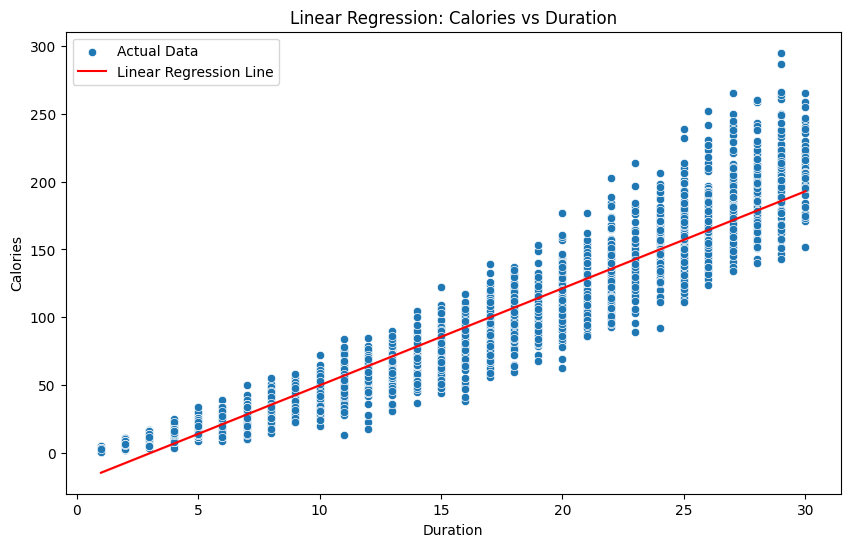

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



# Specify the variables for linear regression
x_variable = "Duration"
y_variable = "Calories"

# Extract features (X) and target variable (y)
X = df[[x_variable]]
y = df[y_variable]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R2 Score
r2 = r2_score(y_test, y_pred)
print('Test data R2 Score:', r2)

# Plot linear regression on the test set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[x_variable], y=y_test, label='Actual Data')
sns.lineplot(x=X_test[x_variable], y=y_pred, color='red', label='Linear Regression Line')
plt.title(f"Linear Regression: {y_variable} vs {x_variable}")
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.legend()
plt.show()


**Linear** **Regression**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred_lin_reg = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_lin_reg)
print("Linear Regresssion Metrics:")
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

print('R2_Score ',r2_score(y_test,y_pred_lin_reg))

Linear Regresssion Metrics:
Mean Squared Error: 345.04099030520086
Root Mean Squared Error: 18.575279010157583
R2_Score  0.914504752724938


**Accuracy** **using** **linear** **regression**

In [ ]:
accuracy_lr = r2 * 100
print("Accuracy (R2_Score) for linear Regression:", accuracy_lr, "%")


Accuracy (R2_Score) for linear Regression: 91.4504752724938 %


**Predicted** **calories** **and**  **Original** **calories** **using** **linear** **regression**

In [ ]:
np.transpose(y_pred_lin_reg)
lin_reg_df=pd.DataFrame(y_pred_lin_reg)
result = y_test.to_frame()
result = result.reset_index(drop=True)
result_lin_reg = result.sort_index()
y_both = pd.concat([lin_reg_df, result_lin_reg], axis=1)
y_both.columns = ['Predicted calories', 'Original calories']
print(y_both)

      Predicted calories  Original calories
0             164.320899              173.0
1             185.781023              189.0
2              57.020282               53.0
3             150.014150              161.0
4             185.781023              226.0
...                  ...                ...
2995          178.627648              186.0
2996           49.866907               53.0
2997          121.400652              120.0
2998           14.100034               20.0
2999          185.781023              214.0

[3000 rows x 2 columns]


**Adaboost** **Regressor**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adaboost_model = AdaBoostRegressor()
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)

# Calculate metrics for AdaBoostRegressor
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
rmse_adaboost = np.sqrt(mse_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost)
print("AdaBoostRegressor Metrics:")
print("Mean Squared Error:", mse_adaboost)
print("Root Mean Squared Error:", rmse_adaboost)
print("R2 Score:", r2_adaboost)

AdaBoostRegressor Metrics:
Mean Squared Error: 294.7274967459604
Root Mean Squared Error: 17.16762932806858
R2 Score: 0.9269715746214165


**Predicted** **calories** **and**  **Original** **calories** **using** **Adaboost**

In [ ]:
np.transpose(y_pred_adaboost)
adaboost_df=pd.DataFrame(y_pred_adaboost)
result = y_test.to_frame()
result = result.reset_index(drop=True)
result_adaboost = result.sort_index()
y_both = pd.concat([adaboost_df, result_adaboost], axis=1)
y_both.columns = ['Predicted calories', 'Original calories']
print(y_both)

      Predicted calories  Original calories
0             177.464166              173.0
1             207.102919              189.0
2              49.520202               53.0
3             151.625544              161.0
4             207.102919              226.0
...                  ...                ...
2995          199.926339              186.0
2996           49.520202               53.0
2997          116.055085              120.0
2998           16.480506               20.0
2999          207.102919              214.0

[3000 rows x 2 columns]


**Accuracy** **of** **ababoost**

In [ ]:
accuracy_ab = r2_adaboost * 100
print("Accuracy (R2 Score) for Adaboost Regressor:", accuracy_ab, "%")


Accuracy (R2 Score) for Adaboost Regressor: 92.69715746214166 %


**RandomForest**

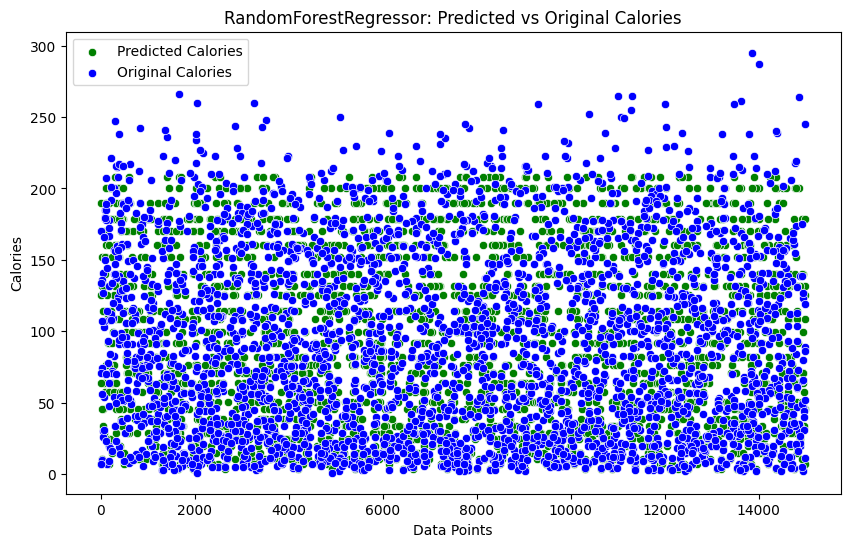

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming you have loaded your data and performed any necessary preprocessing

# Specify the variables for the model
x_variable = "Duration"
y_variable = "Calories"

# Extract features (X) and target variable (y)
X = df[[x_variable]]
y = df[y_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForestRegressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = model_rf.predict(X_test)

# Plot the predicted vs original calories using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.index, y=y_pred_rf, label='Predicted Calories', color='green')
sns.scatterplot(x=y_test.index, y=y_test, label='Original Calories', color='blue')
plt.title("RandomForestRegressor: Predicted vs Original Calories")
plt.xlabel("Data Points")
plt.ylabel("Calories")
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics for Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("\nRandom Forest Regressor Metrics:")
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R2 Score:", r2_rf)


Random Forest Regressor Metrics:
Mean Squared Error: 275.14492292031167
Root Mean Squared Error: 16.58749296669969
R2 Score: 0.9318238009903042


**Predicted** **calories**  **Original** **calories** **using**
**Random** **Forest**

In [ ]:
np.transpose(y_pred_rf)
rf_df=pd.DataFrame(y_pred_rf)
result = y_test.to_frame()
result = result.reset_index(drop=True)
result_rf = result.sort_index()
y_both = pd.concat([rf_df, result_rf], axis=1)
y_both.columns = ['Predicted calories', 'Original calories']
print(y_both)

      Predicted calories  Original calories
0             170.098884              173.0
1             200.014267              189.0
2              50.842013               53.0
3             151.786296              161.0
4             200.014267              226.0
...                  ...                ...
2995          189.779834              186.0
2996           45.807601               53.0
2997          114.074724              120.0
2998           19.430510               20.0
2999          200.014267              214.0

[3000 rows x 2 columns]


In [ ]:
accuracy_rf = r2_rf * 100
print("Accuracy (R2 Score) for Random Forest Regressor:", accuracy_rf, "%")


Accuracy (R2 Score) for Random Forest Regressor: 93.18238009903041 %


In [ ]:
master_prediction = pd.concat([lin_reg_df, rf_df, adaboost_df, result_adaboost], axis = 1)
master_prediction.columns = ['Linear Regression Prediction', 'Random Forest Regressor Prediction',
                             'Adaboost Regressor Prediction', 'Original calories']

**Comapring** **all** **predictions**

In [ ]:
master_prediction.head(20)

,Linear Regression Prediction,Random Forest Regressor Prediction,Adaboost Regressor Prediction,Original calories
0,164.320899,170.102925,172.211893,173.0
1,185.781023,199.860643,213.274800,189.0
2,57.020282,50.791273,45.817255,53.0
3,150.014150,151.891679,153.425756,161.0
4,185.781023,199.860643,213.274800,226.0
5,185.781023,199.860643,213.274800,179.0
6,85.633780,76.015211,75.368348,98.0
7,49.866907,45.855443,45.817255,44.0
8,78.480405,70.395345,75.368348,79.0
9,64.173656,57.220543,54.621107,59.0
